In [ ]:
pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import sklearn.linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error

In [ ]:
symbol='MSFT'
START='2016-01-01'
END='2024-01-01'
data_frame=yf.download(symbol,start=START,end=END)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data_frame

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,54.320000,54.799999,53.389999,54.799999,48.521481,53778000
2016-01-05,54.930000,55.389999,54.540001,55.049999,48.742825,34079700
2016-01-06,54.320000,54.400002,53.639999,54.049999,47.857410,39518900
2016-01-07,52.700001,53.490002,52.070000,52.169998,46.192799,56564900
2016-01-08,52.369999,53.279999,52.150002,52.330002,46.334465,48754000
...,...,...,...,...,...,...
2023-12-22,373.679993,375.179993,372.709991,374.579987,373.215393,17091100
2023-12-26,375.000000,376.940002,373.500000,374.660004,373.295135,12673100
2023-12-27,373.690002,375.059998,372.809998,374.070007,372.707275,14905400


In [ ]:
df = pd.DataFrame(data_frame)
df
df['Prev_open'] = df['Open'].shift(1)
df['Prev_high'] = df['High'].shift(1)
df['Prev_low'] = df['Low'].shift(1)
df['Prev_close'] = df['Close'].shift(1)
df['Prev_volume'] = df['Volume'].shift(1)
df.dropna(inplace=True)


In [ ]:
df['Date']=df.index
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df

,Open,High,Low,Close,Adj Close,Volume,Prev_open,Prev_high,Prev_low,Prev_close,Prev_volume,Date,Day,Month,Year
Date,,,,,,,,,,,,,,,
2016-01-05,54.930000,55.389999,54.540001,55.049999,48.742825,34079700,54.320000,54.799999,53.389999,54.799999,53778000.0,2016-01-05,5,1,2016
2016-01-06,54.320000,54.400002,53.639999,54.049999,47.857410,39518900,54.930000,55.389999,54.540001,55.049999,34079700.0,2016-01-06,6,1,2016
2016-01-07,52.700001,53.490002,52.070000,52.169998,46.192799,56564900,54.320000,54.400002,53.639999,54.049999,39518900.0,2016-01-07,7,1,2016
2016-01-08,52.369999,53.279999,52.150002,52.330002,46.334465,48754000,52.700001,53.490002,52.070000,52.169998,56564900.0,2016-01-08,8,1,2016
2016-01-11,52.509998,52.849998,51.459999,52.299999,46.307907,36943800,52.369999,53.279999,52.150002,52.330002,48754000.0,2016-01-11,11,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,373.679993,375.179993,372.709991,374.579987,373.215393,17091100,372.559998,374.410004,370.040009,373.540009,17708000.0,2023-12-22,22,12,2023
2023-12-26,375.000000,376.940002,373.500000,374.660004,373.295135,12673100,373.679993,375.179993,372.709991,374.579987,17091100.0,2023-12-26,26,12,2023
2023-12-27,373.690002,375.059998,372.809998,374.070007,372.707275,14905400,375.000000,376.940002,373.500000,374.660004,12673100.0,2023-12-27,27,12,2023


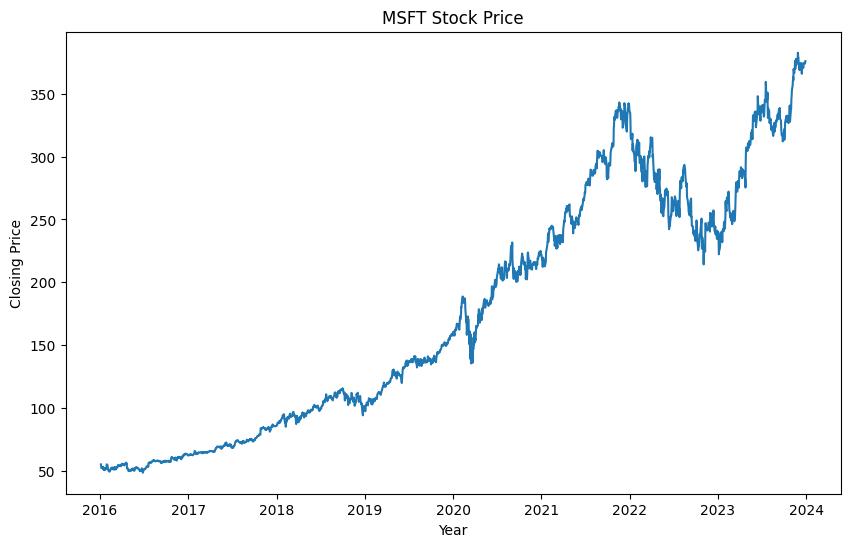

In [ ]:
plt.figure(figsize=(10,6))
plt.title('MSFT Stock Price')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.plot(df['Close'])
plt.show()

In [ ]:
X=df[['Prev_open','Prev_high','Prev_low','Prev_close',]]
Y=df[['Close']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

#rb7
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
Y_train_scaled = scaler.fit_transform(Y_train)


model_used = sklearn.linear_model.LinearRegression()
model_used.fit(X_train_scaled, Y_train_scaled)
X_1 = [[373.690002,	375.059998,	372.809998, 374.070007]] #2nd last from imported data
print(model_used.predict(X_1))

[[373.76269662]]


In [ ]:
Y_pred = model_used.predict(X_test)
Y_pred = Y_pred.flatten()  # Make Y_pred a 1D array
Y_test_values = Y_test['Close'].values  # Extract values from Y_test DataFrame

results = pd.DataFrame({
    'Date': df.index[-len(Y_test):],
    'Actual': Y_test_values,  # Use the extracted values
    'Predicted': Y_pred
})

print(results)

          Date      Actual   Predicted
0   2021-12-30  231.850006  234.004299
1   2021-12-31   91.330002   89.055132
2   2022-01-03   73.160004   73.949789
3   2022-01-04  286.510010  286.190878
4   2022-01-05   74.410004   74.247525
..         ...         ...         ...
498 2023-12-22   92.000000   92.191827
499 2023-12-26  101.930000   97.534260
500 2023-12-27  382.700012  378.551750
501 2023-12-28  253.809998  250.387712
502 2023-12-29   72.400002   73.641597

[503 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


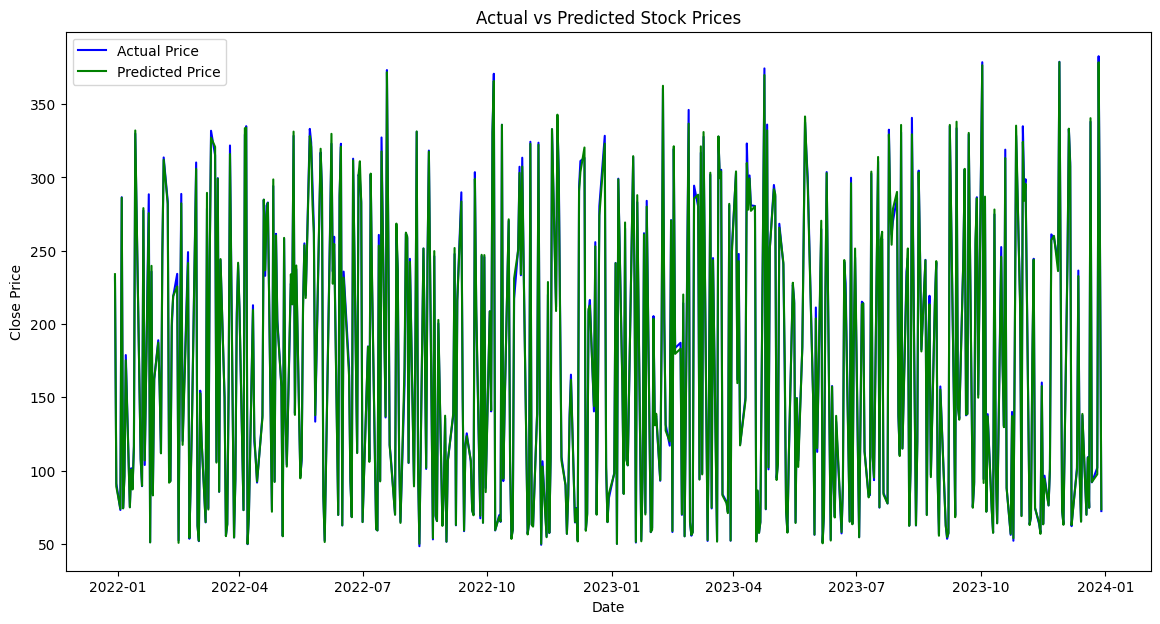

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(results['Date'], results['Actual'], label='Actual Price', color='blue')
plt.plot(results['Date'], results['Predicted'], label='Predicted Price', color='green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse=np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R squared:",r2)

#rb7
Y_train_pred = model_used.predict(X_train)
train_r2 = r2_score(Y_train, Y_train_pred)
test_r2 = r2_score(Y_test, Y_pred)

# Cross-validation R²
cv_r2_scores = cross_val_score(model_used, X_train_scaled, Y_train_scaled, cv=5, scoring='r2')
mean_cv_r2 = np.mean(cv_r2_scores)

print(f"Training R-squared (R²): {train_r2}")
print(f"Test R-squared (R²): {test_r2}")
print(f"Cross-validation R-squared (R²): {mean_cv_r2}")

Mean Absolute Error: 2.144771964407037
Mean Squared Error: 10.898625629906855
Root Mean Squared Error: 3.301306654933294
R squared: 0.9988595378300366
Training R-squared (R²): 0.9986167107402214
Test R-squared (R²): 0.9988595378300366
Cross-validation R-squared (R²): 0.9986171248246773


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


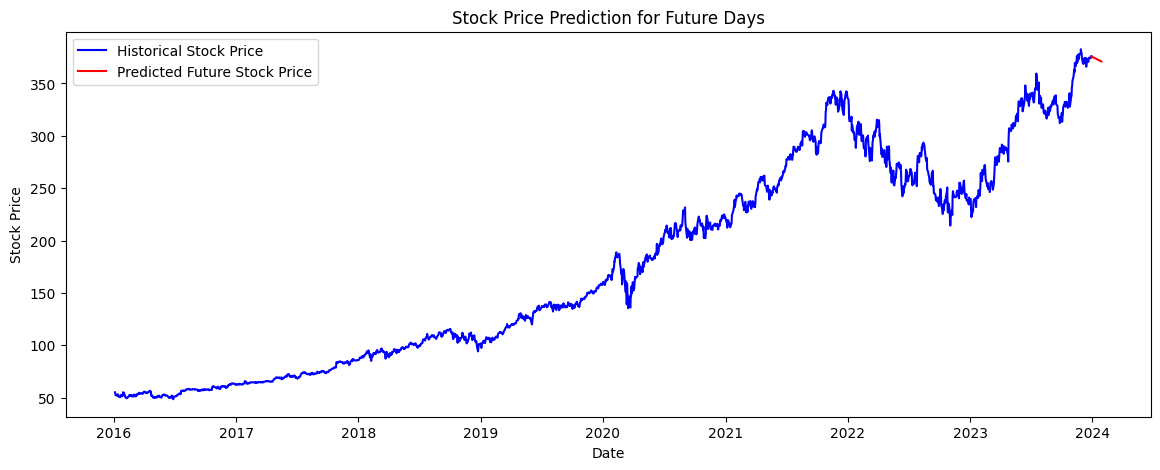

In [ ]:
from sklearn.preprocessing import MinMaxScaler
futuredays = 30  # Number of future days to predict
scaler = MinMaxScaler()

# Ensure the 'Close' column exists
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
time_step = 4  # Match the number of features expected by the model
last_n_days = scaled_data[-time_step:]  # Last `time_step` days of data

predicted_future_prices = []

for i in range(futuredays):
    x_input = last_n_days.reshape((1, -1))  # Use the correct number of features
    predicted_price = model_used.predict(x_input)
    predicted_future_prices.append(predicted_price[0, 0])

    # Append the predicted price to last_n_days and remove the first value                                                                       #ask
    last_n_days = np.append(last_n_days, predicted_price)[1:]  # Ensure it maintains `time_step` elements

# Inverse transform to get actual prices
predicted_future_prices = scaler.inverse_transform(np.array(predicted_future_prices).reshape(-1, 1))

# Generate future dates for the prediction
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=futuredays)  # Start from the next day

# Plot the future predictions with dates on x-axis
plt.figure(figsize=(14, 5))
plt.plot(df.index, df['Close'], color='blue', label='Historical Stock Price')  # Ensure the correct column is plotted
plt.plot(future_dates, predicted_future_prices, color='red', label='Predicted Future Stock Price')
plt.title('Stock Price Prediction for Future Days')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
!pip install mplfinance
import mplfinance as mpf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.8 MB/s eta 0:00:00


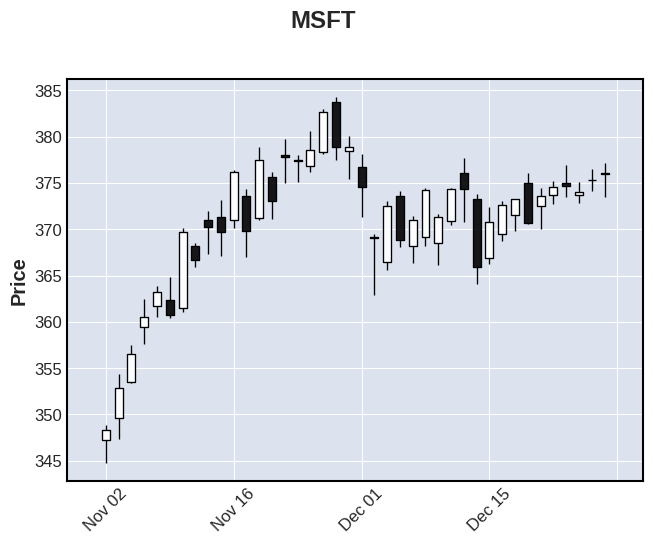

In [ ]:
graph = df[['Open', 'High', 'Low', 'Close', 'Volume']]
graph = graph[-40:]
graph.index.name = 'Date'

mpf.plot(graph, type='candle', title='MSFT', ylabel='Price')